In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

# Helper to avoid overlapping x tick labels: wraps long labels, rotates, and
# ensures enough bottom margin. Use `fix_tick_labels(ax)` after drawing plots.
def fix_tick_labels(ax=None, rotation=45, ha='right', wrap_width=20, bottom=0.30):
    import textwrap
    if ax is None:
        ax = plt.gca()
    labels = [t.get_text() for t in ax.get_xticklabels()]
    if any(labels):
        wrapped = [textwrap.fill(l, wrap_width) if l else l for l in labels]
        ax.set_xticklabels(wrapped, rotation=rotation, ha=ha)
    # Increase bottom margin to make room for multi-line labels
    try:
        fig = ax.get_figure()
        fig.subplots_adjust(bottom=bottom)
    except Exception:
        plt.subplots_adjust(bottom=bottom)
    plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

In [3]:
df = pd.read_excel("df.xlsx")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,...,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,...,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,...,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,...,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,...,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,...,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,...,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,...,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [38]:
df["segment_name"].unique()

array(['Доходные', nan, 'Малодоходные', 'Высокодоходные без ПМ',
       'Защищенные', 'Высокодоходные с ПМ'], dtype=object)

In [39]:
df["is_profitable"] = df["segment_name"].isin(["Доходный", "Высокодоходные без ПМ", "Высокодоходные с ПМ"])
df[["is_profitable", "influencer_flg"]].corr()

,is_profitable,influencer_flg
is_profitable,1.000000,0.317789
influencer_flg,0.317789,1.000000


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf


def map_mark(x):
    if str(x) in ['1', '2', 'без оценки (негативный)']:
        return 1
    return 0

df['is_critical'] = df['review_mark'].apply(map_mark)

df_clean = df.dropna(subset=['new_flg']).copy()
df_clean['new_flg'] = df_clean['new_flg'].astype(int)

basic_themes = ['платежи, переводы и операции', 'мп/лк/терминал', 'карты']
df_clean['is_basic_func'] = df_clean['review_theme'].apply(lambda x: 1 if x in basic_themes else 0)

df_basic = df_clean[df_clean['is_basic_func'] == 1].copy()

contingency_table = pd.crosstab(df_basic['new_flg'], df_basic['is_critical'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

prop_new = df_basic[df_basic['new_flg'] == 1]['is_critical'].mean()
prop_old = df_basic[df_basic['new_flg'] == 0]['is_critical'].mean()

print(f"Доля критических проблем (Новые клиенты): {prop_new:.2%}")
print(f"Доля критических проблем (Старые клиенты): {prop_old:.2%}")
print(f"P-value (Хи-квадрат): {p_val:.5f}")

model = smf.logit("is_critical ~ new_flg", data=df_basic).fit()
print("\nРезультаты логистической регрессии:")
print(model.summary())

odds_ratio = np.exp(model.params['new_flg'])
print(f"\nОтношение шансов (Odds Ratio) для новых клиентов: {odds_ratio:.2f}")

print("\n--- Анализ подгрупп (Отношение шансов) ---")
df_reg = df_basic.dropna(subset=['gender_cd', 'education_level_cd'])

subgroups = ['gender_cd', 'education_level_cd']
results = []

for col in subgroups:
    for val in df_reg[col].unique():
        sub_df = df_reg[df_reg[col] == val]
        if len(sub_df) < 50: continue
        
        ct = pd.crosstab(sub_df['new_flg'], sub_df['is_critical'])
        if ct.shape == (2,2):
            or_val, p_val_sub = stats.fisher_exact(ct)
            results.append({
                'Группа': f"{col}={val}", 
                'Odds Ratio': or_val, 
                'P-Value': p_val_sub
            })

results_df = pd.DataFrame(results)
print(results_df)

diffs = []
group_new = df_basic[df_basic['new_flg'] == 1]['is_critical'].values
group_old = df_basic[df_basic['new_flg'] == 0]['is_critical'].values

for _ in range(1000):
    s_new = np.random.choice(group_new, size=len(group_new), replace=True)
    s_old = np.random.choice(group_old, size=len(group_old), replace=True)
    diffs.append(s_new.mean() - s_old.mean())

ci_lower = np.percentile(diffs, 2.5)
ci_upper = np.percentile(diffs, 97.5)
print(f"\nBootstrap 95% CI разницы долей (Новые - Старые): [{ci_lower:.4f}, {ci_upper:.4f}]")

Доля критических проблем (Новые клиенты): 65.02%
Доля критических проблем (Старые клиенты): 51.40%
P-value (Хи-квадрат): 0.00004
Optimization terminated successfully.
         Current function value: 0.691689
         Iterations 4

Результаты логистической регрессии:
                           Logit Regression Results                           
Dep. Variable:            is_critical   No. Observations:                10386
Model:                          Logit   Df Residuals:                    10384
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                0.001247
Time:                        08:48:16   Log-Likelihood:                -7183.9
converged:                       True   LL-Null:                       -7192.9
Covariance Type:            nonrobust   LLR p-value:                 2.281e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [22]:
len(df[df["review_theme"] == "Не определено"])

1377

In [26]:
df.columns

Index(['review_dttm', 'finish_dttm', 'id_client', 'company', 'review_mark',
       'review_emotion', 'review_source', 'business_line', 'product', 'reason',
       'review_theme', 'subtheme', 'review_text', 'solution_flg', 'gender_cd',
       'education_level_cd', 'marital_status_cd', 'children_cnt',
       'citizenship_country', 'segment_name', 'subscription_important_flg',
       'new_flg', 'influencer_flg', 'age_segment', 'csat_score', 'is_solved',
       'is_critical'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

df['is_vip'] = df['influencer_flg'].fillna(0).astype(int)


neg_reviews = df[df['review_emotion'] == 'Негативный'].copy()
neg_reviews['is_tariff_issue'] = (neg_reviews['review_theme'] == 'тарифы и условия').astype(int)

share_vip = neg_reviews[neg_reviews['is_vip'] == 1]['is_tariff_issue'].mean()
share_novip = neg_reviews[neg_reviews['is_vip'] == 0]['is_tariff_issue'].mean()

print(f"--- Результаты проверки гипотезы ---")
print(f"Доля жалоб на тарифы среди VIP (influencer): {share_vip:.2%}")
print(f"Доля жалоб на тарифы среди остальных: {share_novip:.2%}")

contingency = pd.crosstab(neg_reviews['is_vip'], neg_reviews['is_tariff_issue'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency)
print(f"Значимость различий (P-value): {p_val:.6f} (если < 0.05, разница не случайна)")

model_df = neg_reviews[['is_tariff_issue', 'is_vip', 'gender_cd', 'age_segment']].dropna()
model_df = pd.get_dummies(model_df, columns=['age_segment'], drop_first=True)
model_df['is_male'] = (model_df['gender_cd'] == 'M').astype(int)

X = sm.add_constant(model_df.drop(['is_tariff_issue', 'gender_cd'], axis=1).astype(float))
y = model_df['is_tariff_issue']

try:
    logit = sm.Logit(y, X).fit(disp=0)
    print("\nВлияние VIP-статуса (коэффициент регрессии):")
    print(f"Coef: {logit.params['is_vip']:.4f} (Положительный = VIP чаще жалуются на это)")
except:
    print("Ошибка построения модели")


vip_df = df[df['is_vip'] == 1].copy()

theme_stats = vip_df.groupby('review_theme').agg(
    total_reviews=('id_client', 'count'),
    negative_count=('review_emotion', lambda x: (x == 'Негативный').sum())
).reset_index()

theme_stats['negativity_rate'] = theme_stats['negative_count'] / theme_stats['total_reviews']

total_vip_negatives = theme_stats['negative_count'].sum()
theme_stats['share_of_all_complaints'] = theme_stats['negative_count'] / total_vip_negatives

robust_themes = theme_stats[theme_stats['total_reviews'] > 50].copy()

print("\n--- ТОП-5 самых 'токсичных' тем для VIP (по доле негатива внутри темы) ---")
print(robust_themes.sort_values('negativity_rate', ascending=False)[['review_theme', 'negativity_rate', 'total_reviews']].head(5))

print("\n--- ТОП-5 тем по массовости жалоб VIP (по количеству жалоб) ---")
print(robust_themes.sort_values('share_of_all_complaints', ascending=False)[['review_theme', 'share_of_all_complaints', 'negative_count']].head(5))

--- Результаты проверки гипотезы ---
Доля жалоб на тарифы среди VIP (influencer): 16.31%
Доля жалоб на тарифы среди остальных: 10.77%
Значимость различий (P-value): 0.000000 (если < 0.05, разница не случайна)

Влияние VIP-статуса (коэффициент регрессии):
Coef: 0.4172 (Положительный = VIP чаще жалуются на это)

--- ТОП-5 самых 'токсичных' тем для VIP (по доле негатива внутри темы) ---
                     review_theme  negativity_rate  total_reviews
10          коммуникации клиентам         0.950000            160
18  погашение кредитных продуктов         0.941538            325
1                   Не определено         0.934545            275
8                           карты         0.855055            821
24                  ценные бумаги         0.824034            699

--- ТОП-5 тем по массовости жалоб VIP (по количеству жалоб) ---
        review_theme  share_of_all_complaints  negative_count
21  тарифы и условия                 0.163072             877
8              карты        

In [42]:
df.groupby("id_client")["review_text"].count().to_frame().sort_values(by="review_text", ascending=False).head(10)

,review_text
id_client,
47b339900054013654788064fabdc5e8,39
0c0ba17790699c120bbd1d9c0dd9cc37,25
bac5ac0b0abf8c4377afb9fd08236045,22
3137a76a555a5de3469a216e1dc91cec,22
aff41d141021613c9de49043afa9d9ed,21
e51189207ead157af842fa10a46c1904,20
a864cd540a0d846a8c0446076d94e384,19
28b14014ef2358def31622d8a1978272,16
71e1282a4586671156d14548394a95f9,15


<Axes: >

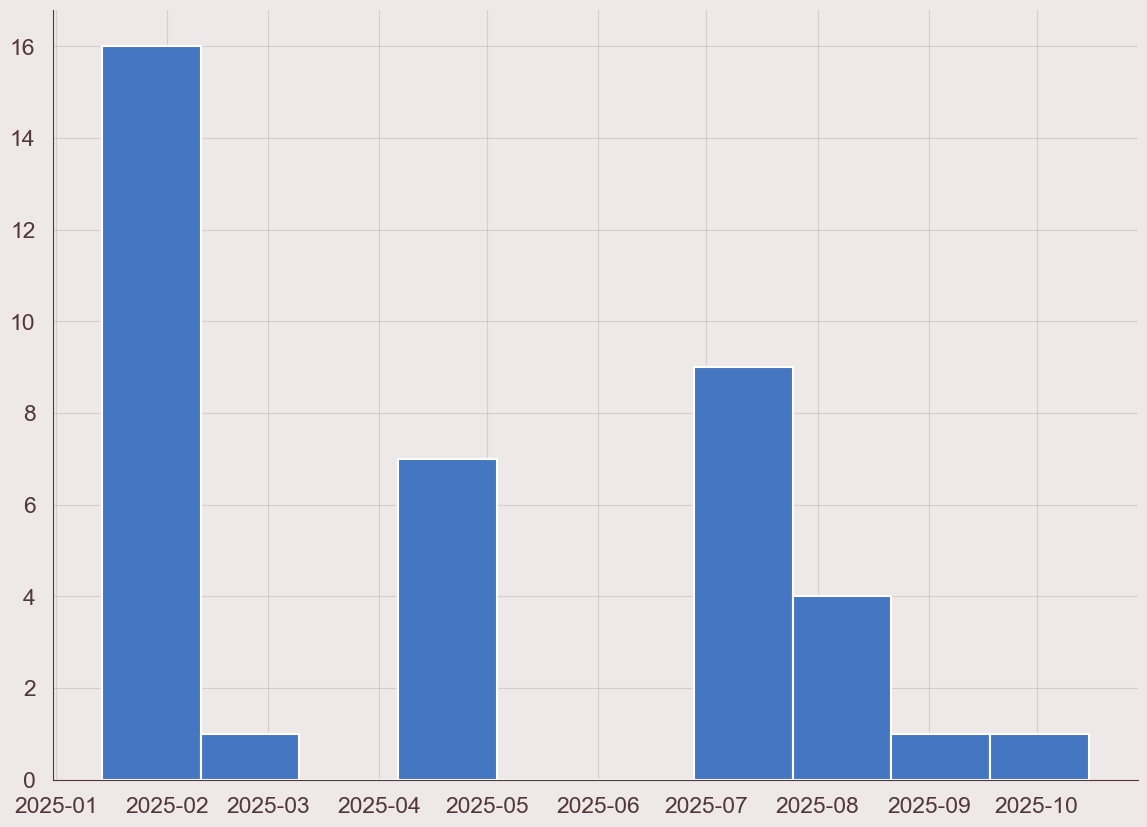

In [46]:
plt.figure(figsize=(14, 10))
df[df["id_client"] == "47b339900054013654788064fabdc5e8"]["review_dttm"].hist()

In [36]:
df[(df["is_vip"].astype(bool)) & (df["review_emotion"] == "Негативный")]["review_theme"].value_counts()

review_theme
тарифы и условия                 877
карты                            702
ценные бумаги                    576
кэшбек                           412
мп/лк/терминал                   360
акции                            313
погашение кредитных продуктов    306
aml                              290
платежи, переводы и операции     257
Не определено                    257
заявки                           198
коммуникации клиентам            152
документы и справки              122
дополнительные услуги            116
налоги                            99
доставки                          78
нефинансовые услуги               77
расторжение договора              73
изменение данных                  65
обеспечительные меры              44
условия работы                     1
увольнение                         1
страховое событие                  1
оформление                         1
Name: count, dtype: int64

In [34]:
df[df["is_vip"].astype(bool)]["review_theme"].value_counts()

review_theme
тарифы и условия                 4901
кэшбек                           1646
платежи, переводы и операции     1116
дополнительные услуги             883
карты                             821
мп/лк/терминал                    719
ценные бумаги                     699
акции                             561
aml                               533
заявки                            393
погашение кредитных продуктов     325
документы и справки               297
налоги                            279
Не определено                     275
коммуникации клиентам             160
доставки                          129
расторжение договора              127
нефинансовые услуги               103
изменение данных                   99
обеспечительные меры               67
страховое событие                  18
качество связи                      3
условия работы                      1
увольнение                          1
оформление                          1
Name: count, dtype: int64

In [29]:
df[df["review_theme"] == "тарифы и условия"]["influencer_flg"].value_counts()

influencer_flg
0.0    8176
1.0    4901
Name: count, dtype: int64

In [37]:
df[df["review_emotion"] == "Негативный"]["review_theme"].value_counts()

review_theme
карты                            4099
тарифы и условия                 2700
погашение кредитных продуктов    1871
платежи, переводы и операции     1390
aml                              1353
Не определено                    1265
акции                            1153
кэшбек                           1136
заявки                           1128
мп/лк/терминал                    934
ценные бумаги                     845
коммуникации клиентам             787
страховое событие                 693
документы и справки               654
обеспечительные меры              464
расторжение договора              453
дополнительные услуги             379
доставки                          361
изменение данных                  300
нефинансовые услуги               145
налоги                            143
оформление                         17
увольнение                         14
условия работы                      5
зарплата                            3
качество связи                      2

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

df['is_solved'] = df['solution_flg'].apply(lambda x: 1 if x == 'проблема решена' else 0)

system_themes = [
    'мп/лк/терминал',
    'доставки',
    'документы и справки',
    'изменение данных',
    'заявки'
]

subset = df[
    df['review_theme'].isin(system_themes) & 
    df['segment_name'].notna()
].copy()

print("=== Resolution Rate (Процент решения проблем) по сегментам ===")
seg_summary = subset.groupby('segment_name').agg(
    total_cases=('id_client', 'count'),
    solved_cases=('is_solved', 'sum')
).reset_index()

seg_summary['resolution_rate'] = seg_summary['solved_cases'] / seg_summary['total_cases']
print(seg_summary.sort_values('resolution_rate', ascending=False))
print("\n")

print("=== Статистический тест (Chi-Square) ===")

group_high_income = seg_summary[seg_summary['segment_name'] == 'Высокодоходные без ПМ'].iloc[0]
group_low_income = seg_summary[seg_summary['segment_name'] == 'Малодоходные'].iloc[0]

matrix = [
    [group_high_income['solved_cases'], group_high_income['total_cases'] - group_high_income['solved_cases']],
    [group_low_income['solved_cases'], group_low_income['total_cases'] - group_low_income['solved_cases']]
]

chi2, p_val, dof, expected = stats.chi2_contingency(matrix)

print(f"Сравниваем сегменты: '{group_high_income['segment_name']}' vs '{group_low_income['segment_name']}'")
print(f"P-value: {p_val:.5f}")
if p_val < 0.05:
    print("Результат: Различия СТАТИСТИЧЕСКИ ЗНАЧИМЫ (гипотеза подтверждена)")
else:
    print("Результат: Различия случайны")
print("\n")

print("=== Логистическая регрессия ===")

model_df = subset.copy()
model_df['is_high_income_no_pm'] = model_df['segment_name'].apply(lambda x: 1 if x == 'Высокодоходные без ПМ' else 0)
model_df['is_low_income'] = model_df['segment_name'].apply(lambda x: 1 if x == 'Малодоходные' else 0)

X = sm.add_constant(model_df[['is_high_income_no_pm', 'is_low_income']])
y = model_df['is_solved']

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

coef_high = logit_model.params['is_high_income_no_pm']
print(f"\nКоэффициент для 'Высокодоходные без ПМ': {coef_high:.4f}")
if coef_high < 0:
    print("Интерпретация: Принадлежность к этому сегменту СНИЖАЕТ вероятность решения проблемы.")

=== Resolution Rate (Процент решения проблем) по сегментам ===
            segment_name  total_cases  solved_cases  resolution_rate
3             Защищенные          156            53         0.339744
4           Малодоходные         1524           512         0.335958
2               Доходные         2548           793         0.311224
1    Высокодоходные с ПМ          167            51         0.305389
0  Высокодоходные без ПМ          292            59         0.202055


=== Статистический тест (Chi-Square) ===
Сравниваем сегменты: 'Высокодоходные без ПМ' vs 'Малодоходные'
P-value: 0.00001
Результат: Различия СТАТИСТИЧЕСКИ ЗНАЧИМЫ (гипотеза подтверждена)


=== Логистическая регрессия ===
Optimization terminated successfully.
         Current function value: 0.619316
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              is_solved   No. Observations:                 4687
Model:                          Logit   